<a href="https://colab.research.google.com/github/MatheusMartini/Python/blob/main/introduction_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# rating uri
uri = "https://raw.githubusercontent.com/MatheusMartini/Python/main/introduction%20to%20data%20science/class1/ratings.csv"

notes = pd.read_csv(uri)
notes.head()

In [ ]:
# total votes
notes.shape

In [26]:
# overwrite
notes.columns = ["userId","moviesId","rating","moment rating"] 

In [ ]:
# total rating
notes["rating"].value_counts()

In [ ]:
# mean
print("media is",notes["rating"].mean())
# median
print("median is",notes.rating.median())

In [ ]:
# notes describe
notes.rating.describe()

In [ ]:
# notes graph
notes.rating.plot(kind = 'hist')

In [ ]:
import seaborn as sns
# notes graph using seaborn
# axis x y
print(sns.boxplot(y=notes.rating))

In [82]:
######

In [ ]:
# movies uri
uri = "https://raw.githubusercontent.com/MatheusMartini/Python/main/introduction%20to%20data%20science/class1/movies.csv"

movies = pd.read_csv(uri)
movies.head()

In [89]:
# query searching average movie rating
notes.query("movieId == 2").rating.mean()

3.4318181818181817

In [103]:
# grouped movieId using groupby getting the average
mean_movie = notes.groupby("movieId").rating.mean()
mean_movie.head()

In [ ]:
# hist
mean_movie.plot(kind = "hist")

In [ ]:
# describe notes
mean_movie.describe()

In [ ]:
# distplot with sns 
print(sns.distplot(mean_movie,bins=15))
print(sns.displot(mean_movie,bins=15))

In [ ]:
# pandas and seaborn use matplotlib
import matplotlib.pyplot as plt
plt.hist(mean_movie)

In [ ]:
# uri tmdb
uri ="https://raw.githubusercontent.com/MatheusMartini/Python/main/introduction%20to%20data%20science/class1/tmdb_5000_movies.csv"
tmdb = pd.read_csv(uri)
tmdb.head()

In [ ]:
# language in data frame original
count_language = tmdb["original_language"].value_counts().to_frame().reset_index()
count_language.columns = ["original_language","total language"]
count_language.head()

In [ ]:
# language graph with seaborn
sns.catplot(x="original_language",kind="count",data = tmdb)

In [ ]:
# language graph using matplotlib
plt.pie(count_language["total language"],labels = count_language["original_language"])

In [249]:
# language variables 
total_per_language = tmdb["original_language"].value_counts()
total_all = total_per_language.sum()
total_en = total_per_language.loc["en"]
total_remainder =  total_all - total_en 

In [ ]:
# data created with language and total
data = {
    "language" : ["English","others"],
    "total" : [total_en, total_remainder]
}
data

In [ ]:
# data frame created using pandas
pd.DataFrame(data)

In [ ]:
# language graph with matplotlib
plt.pie(data["total"],labels = data["language"])

In [ ]:
# language graph with seaborn
sns.barplot(x="language", y="total", data = data)

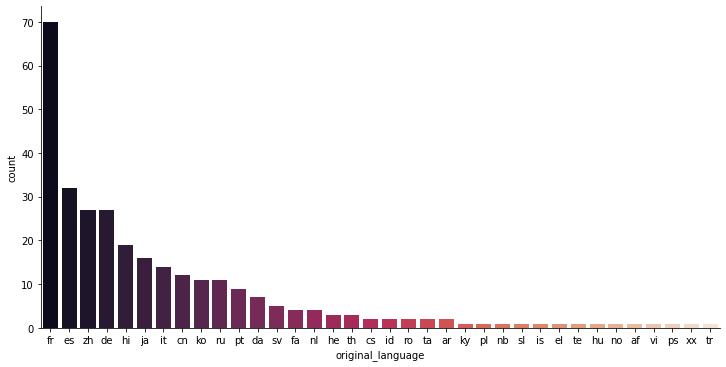

In [310]:
total_per_language_other = tmdb.query("original_language != 'en'").original_language.value_counts()
movies_without_en = tmdb.query("original_language != 'en'")
sns.catplot(x="original_language",
            kind="count",
            data = movies_without_en,
            aspect = 2,
            palette= "rocket",
            order = total_per_language_other.index )